In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np

data_file = "data/Takeout/Fit/Daily Aggregations/Daily Summaries.csv"

df = pd.read_csv(data_file)

df = df[['Date', 
         'Average diastolic blood pressure (mmHg)', 
         'Average systolic blood pressure (mmHg)', 
         'Walking duration (ms)',
         'Biking duration (ms)',
         'Mountain biking duration (ms)',
         'Calories (kcal)',
         'Distance (m)']]

df = df.sort_values(by=['Date'])

# Tweak some fields around to make them more usable
df['Biking duration (s)'] = df['Biking duration (ms)'].fillna(0) + df['Mountain biking duration (ms)'].fillna(0)
df['Biking duration (hours)'] = df['Biking duration (s)'] / (1000 * 60 * 60)
df['Walking duration (hours)'] = df['Walking duration (ms)'].fillna(0) / (1000 * 60 * 60) 
df['Distance (m)'] = df['Distance (m)'].fillna(0)
df['Datetime'] = pd.to_datetime(df['Date'])
df['Year'] = df['Datetime'].dt.year
df['Week'] = df['Datetime'].dt.week
df['Day Count'] = 1
df = df.drop(['Biking duration (ms)', 'Mountain biking duration (ms)', 'Walking duration (ms)', 'Date'], axis=1)

# Group by week
# Yes, there's an average of averages in there... but blood pressure isn't an exact science so no harm here
df = df.groupby(['Year', 'Week']).agg({
    'Average diastolic blood pressure (mmHg)': 'mean', 
    'Average systolic blood pressure (mmHg)': 'mean', 
    'Biking duration (hours)': 'sum',
    'Walking duration (hours)': 'sum',
    'Calories (kcal)': 'sum',
    'Distance (m)': 'sum',
    'Day Count': 'sum',
    'Week': 'max'
})

# Only want full weeks
google_data = df[df['Day Count'] == 7].dropna()

google_data['Excercise Duration (hours)'] = google_data['Walking duration (hours)'] + google_data['Biking duration (hours)']

google_data.head(1000)

Average diastolic blood pressure (mmHg)  \
Year Week                                            
2019 15                                  94.000000   
     16                                  91.020431   
     17                                  90.428571   
     18                                  90.000000   
     19                                  92.666667   
     20                                  88.300000   
     21                                  86.285714   
     22                                  88.666667   
     23                                  88.808788   
     24                                  87.333333   
     25                                  85.300000   
     26                                  87.600000   

           Average systolic blood pressure (mmHg)  Biking duration (hours)  \
Year Week                                                                    
2019 15                                145.000000                 0.961097   
     16                                140.622505                 0.313189   
     17                                142.285714                 0.939453   
     18                                141.333333                 1.740077   
     19                                144.000000                 0.296085   
     20                                136.600000                 0.800627   
     21                                136.142857                 1.363603   
     22                                133.666667                 3.898814   
     23                                133.423018                 4.623440   
     24                                136.666667                 0.922102   
     25                                136.700000                 1.554523   
     26                                143.400000                 0.854952   

           Walking duration (hours)  Calories (kcal)  Distance (m)  Day Count  \
Year Week                                                                       
2019 15                   11.905849     19311.482866  41338.217438          7   
     16                   12.077749     18974.924116  44821.749235          7   
     17                   13.316962     19744.215406  42979.095955          7   
     18                   11.748733     19422.074738  46659.869240          7   
     19                    8.868330     17779.677104  21531.104596          7   
     20                   15.063880     20872.722322  62617.057499          7   
     21                   17.399181     21356.357342  72036.243751          7   
     22                    9.295621     19521.785915  69165.915321          7   
     23                    6.702938     19627.365926  97275.942231          7   
     24                    7.645814     17575.480439  37110.954258          7   
     25                    9.100937     18560.789125  51283.497402          7   
     26                   10.644188     18735.053145  47694.938380          7   

           Week  Excercise Duration (hours)  
Year Week                                    
2019 15      15                   12.866946  
     16      16                   12.390938  
     17      17                   14.256415  
     18      18                   13.488810  
     19      19                    9.164415  
     20      20                   15.864507  
     21      21                   18.762784  
     22      22                   13.194435  
     23      23                   11.326378  
     24      24                    8.567916  
     25      25                   10.655460  
     26      26                   11.499140

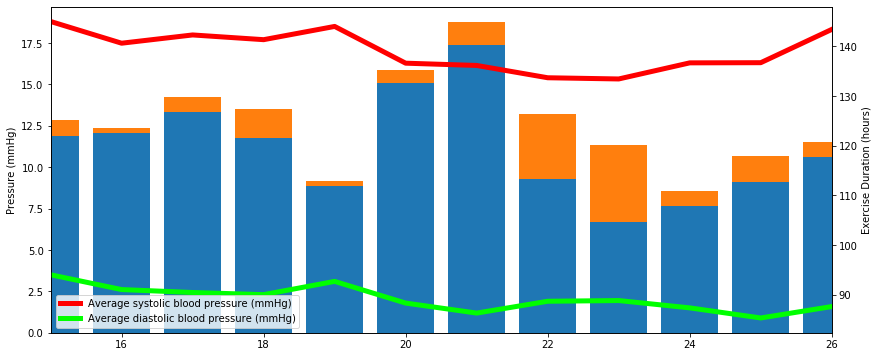

In [2]:
fig, ax1 = plt.subplots(figsize=(14, 6))

plt.bar(google_data['Week'], google_data['Walking duration (hours)'])
plt.bar(google_data['Week'], google_data['Biking duration (hours)'], bottom=google_data['Walking duration (hours)'])

ax2 = ax1.twinx()
google_data.plot(ax=ax2, kind='line', x='Week', y='Average systolic blood pressure (mmHg)', linewidth=5.0, color='red')
google_data.plot(ax=ax2, kind='line', x='Week', y='Average diastolic blood pressure (mmHg)', linewidth=5.0, color='lime')

ax1.set_ylabel('Pressure (mmHg)')
ax2.set_ylabel('Exercise Duration (hours)')
plt.show()

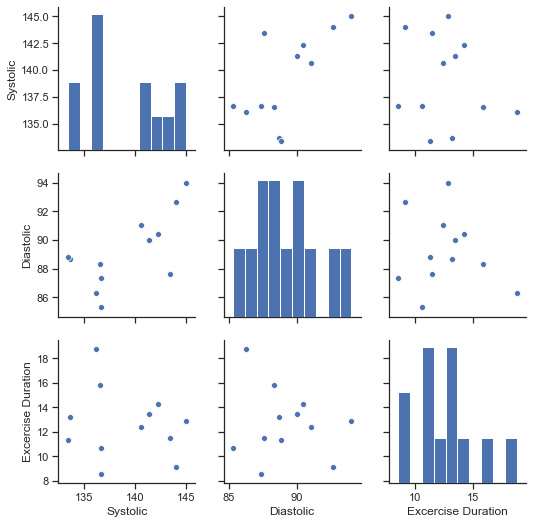

In [3]:
import seaborn as sns; 

sns.set(style="ticks", color_codes=True)
corr_data = google_data[['Average systolic blood pressure (mmHg)', 
                         'Average diastolic blood pressure (mmHg)', 
                         'Excercise Duration (hours)']].rename(index=str, columns={
    'Average systolic blood pressure (mmHg)': 'Systolic', 
    'Average diastolic blood pressure (mmHg)': 'Diastolic',
    'Excercise Duration (hours)': 'Excercise Duration'
})
g = sns.pairplot(corr_data)